<img src="./logo_UTN.svg" align="right" width="150" />

#### Procesamiento Digital de Señales
# TS4: Simulación de un ADC
#### Eloy Silva

### Configuración e inicio de la simulación

In [24]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (13,7)

import warnings
warnings.filterwarnings('ignore')
 
# Datos generales de la simulación
fs = 1000.0 # frecuencia de muestreo (Hz)
N = 1000   # cantidad de muestras
 
# cantidad de veces más densa que se supone la grilla temporal para tiempo "continuo"
over_sampling = 4
N_os = N*over_sampling
 
# Datos del ADC
B = 4 # bits
Vf = 2 # Volts
q = Vf/2**B # Volts
 
# datos del ruido
kn = 1
pot_ruido = ((q**2)/12)*kn # Watts (potencia de la señal 1 W)
 
ts = 1/fs # tiempo de muestreo
df = fs/N # resolución espectral

### Generación de señales, ruidos y cálculo de espectros

In [25]:
f0 = 1          #Frecuencia de la señal
A = np.sqrt(2)  #Amplitud de la señal original para potencia unitaria

tt_os = np.arange(0, N/fs, 1/(over_sampling*fs))    #Generación del vector de tiempo con oversampling
tt = np.arange(0, N/fs, 1/fs)                       #Generación del vector de tiempo

analog_sig = A*np.sin(2*np.pi*f0*tt_os)                 #Generación de señal senoidal
n = np.random.normal(0, np.sqrt(pot_ruido), N_os)       #Ruido aleatorio analógico
sr = analog_sig[::over_sampling] + n[::over_sampling]   #Señal contaminada
srq = np.round(sr/q)*q                                  #Señal cuantizada
nq = srq - sr                                           #Ruido de cuantización

ff = np.arange(0, fs, df)                   #Vector de frecuencias
ff_os = np.arange(0, fs, df/over_sampling)  #Vector de frecuencias con oversampling

ft_As = np.fft.fft(analog_sig)/(N_os)       #Espectro de señal original
ft_Srq = np.fft.fft(srq)/(N)                #Espectro de señal cuantizada
ft_SR = np.fft.fft(sr)/(N)                  #Espectro de señal con ruido analógico
ft_Nn = np.fft.fft(n)/(N_os)                #Espectro de ruido analógico
ft_Nq = np.fft.fft(nq)/(N)                  #Espectro de ruido de cuantización

### Gráficos

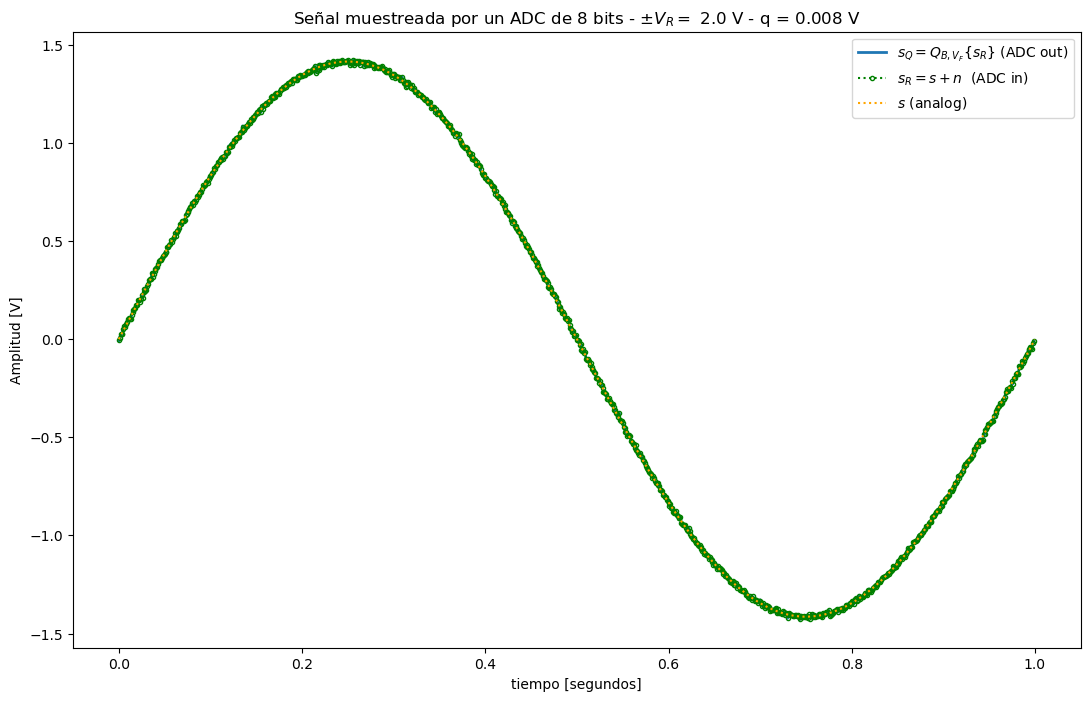

Text(0.5, 1.0, 'Ruido de cuantización para 8 bits - $\\pm V_R= $ 2.0 V - q = 0.008 V')

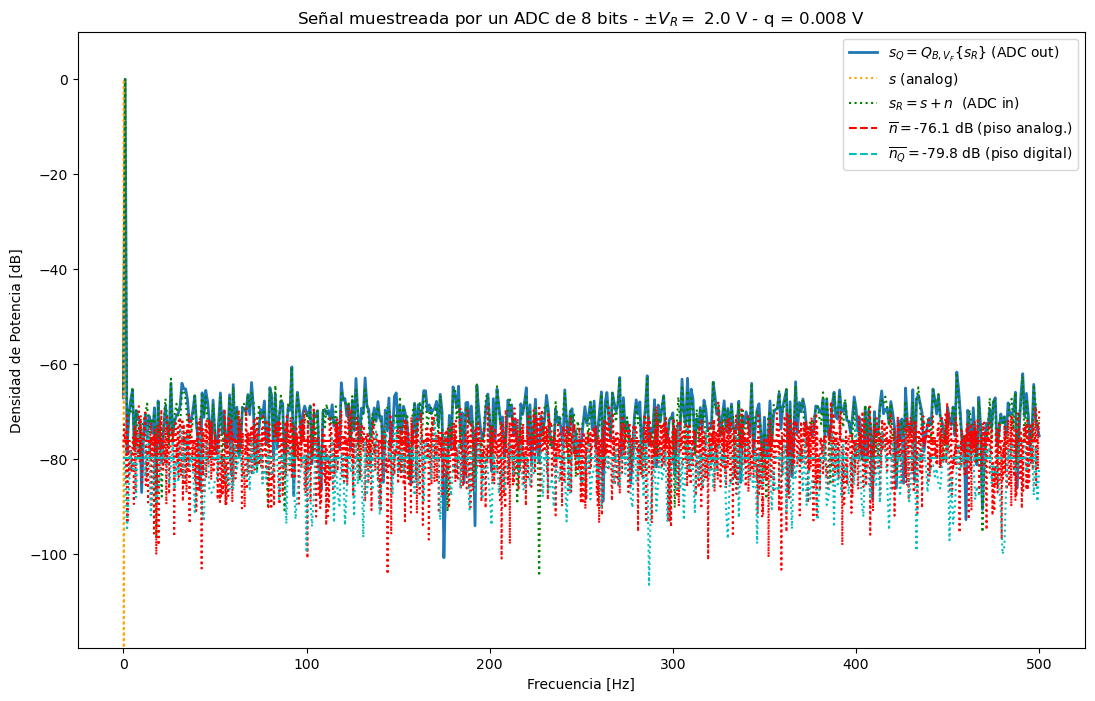

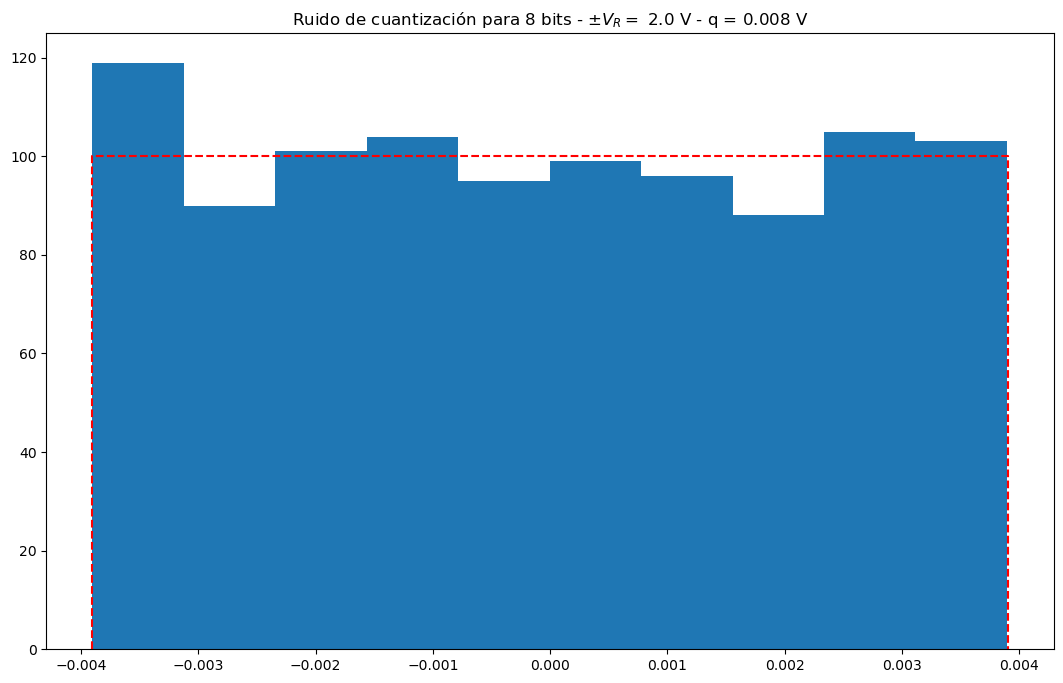

In [55]:
plt.close('all')

plt.figure(1)
plt.plot(tt, srq, lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)')
plt.plot(tt, sr, linestyle=':', color='green',marker='o', markersize=3, markerfacecolor='none', markeredgecolor='green', fillstyle='none', label='$ s_R = s + n $  (ADC in)')
plt.plot(tt_os, analog_sig, color='orange', ls='dotted', label='$ s $ (analog)')
 
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()

plt.figure(2)
bfrec = ff <= fs/2
 
Nnq_mean = np.mean(np.abs(ft_Nq)**2)
nNn_mean = np.mean(np.abs(ft_Nn)**2)

plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)' )
plt.plot( ff_os[ff_os <= fs/2], 10* np.log10(2*np.abs(ft_As[ff_os <= fs/2])**2), color='orange', ls='dotted', label='$ s $ (analog)' )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), ':g', label='$ s_R = s + n $  (ADC in)' )
plt.plot( ff_os[ff_os <= fs/2], 10* np.log10(2*np.abs(ft_Nn[ff_os <= fs/2])**2), ':r')
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), '--r', label= '$ \overline{n} = $' + '{:3.1f} dB (piso analog.)'.format(10* np.log10(2* nNn_mean)) )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB (piso digital)'.format(10* np.log10(2* Nnq_mean)) )
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
axes_hdl = plt.gca()
axes_hdl.legend()
# suponiendo valores negativos de potencia ruido en dB
plt.ylim((1.5*np.min(10* np.log10(2* np.array([Nnq_mean, nNn_mean]))),10))
 
plt.figure(3)
bins = 10
plt.hist(nq, bins=bins)
plt.plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q))

### Volvemos a ejecutar para: B=8 bits y Kn=10 

In [50]:
# Datos del ADC
B = 8 # bits
Vf = 2 # Volts
q = Vf/2**B # Volts

# datos del ruido
kn = [0.1, 1, 10]
pot_ruido = [((q**2)/12)*k for k in kn] # Watts (potencia de la señal 1 W)

### Volvemos a ejecutar para: B=8 bits y Kn=[0.1, 1, 10] para tener ruido analógico por debajo y por encima del de cuantización 

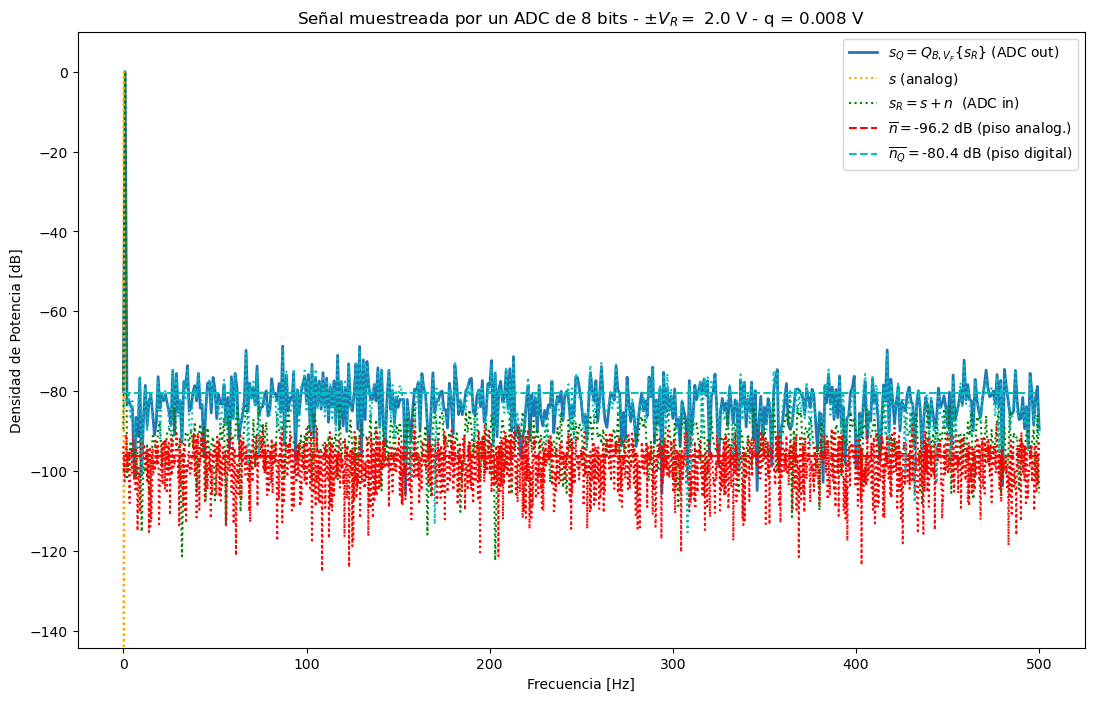

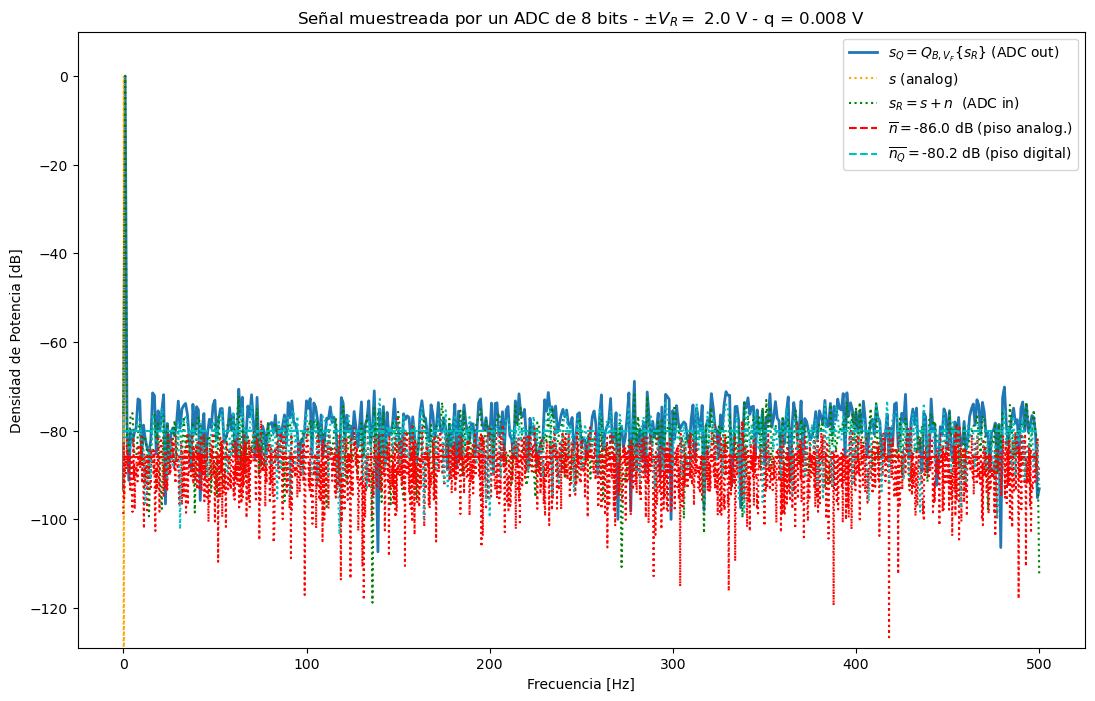

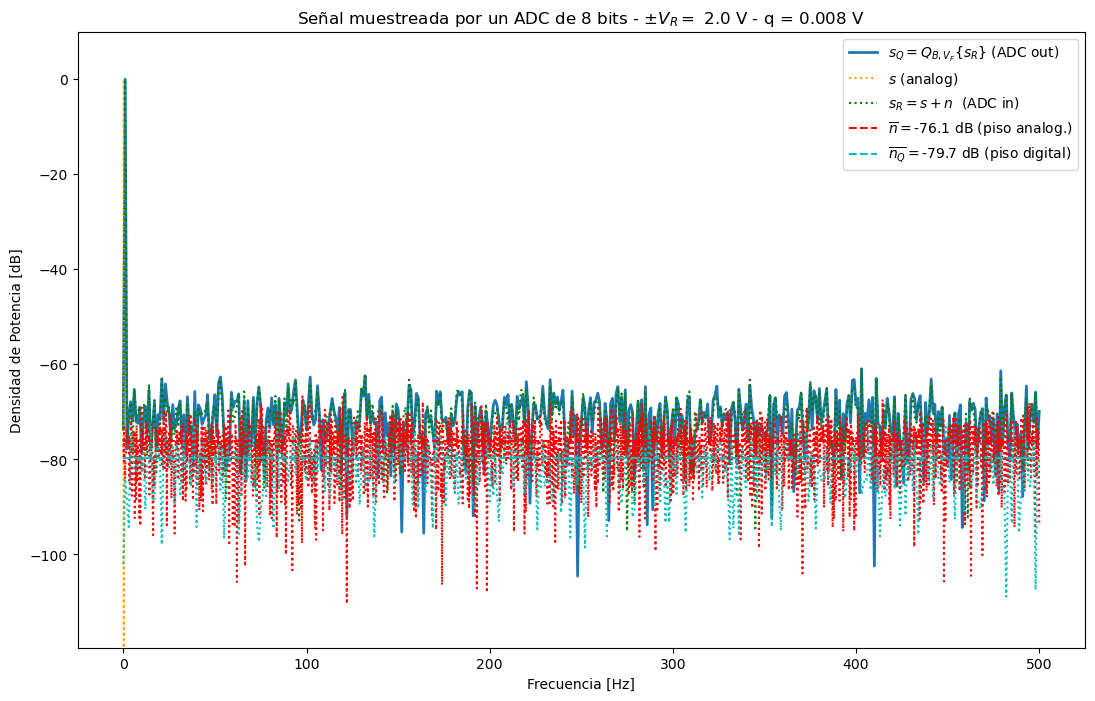

In [56]:
for Pn in pot_ruido:

    f0 = 1          #Frecuencia de la señal
    A = np.sqrt(2)  #Amplitud de la señal original para potencia unitaria
    
    tt_os = np.arange(0, N/fs, 1/(over_sampling*fs))    #Generación del vector de tiempo con oversampling
    tt = np.arange(0, N/fs, 1/fs)                       #Generación del vector de tiempo
    
    analog_sig = A*np.sin(2*np.pi*f0*tt_os)                 #Generación de señal senoidal
    n = np.random.normal(0, np.sqrt(Pn), N_os)       #Ruido aleatorio analógico
    sr = analog_sig[::over_sampling] + n[::over_sampling]   #Señal contaminada
    srq = np.round(sr/q)*q                                  #Señal cuantizada
    nq = srq - sr                                           #Ruido de cuantización
    
    ff = np.arange(0, fs, df)                   #Vector de frecuencias
    ff_os = np.arange(0, fs, df/over_sampling)  #Vector de frecuencias con oversampling
    
    ft_As = np.fft.fft(analog_sig)/(N_os)       #Espectro de señal original
    ft_Srq = np.fft.fft(srq)/(N)                #Espectro de señal cuantizada
    ft_SR = np.fft.fft(sr)/(N)                  #Espectro de señal con ruido analógico
    ft_Nn = np.fft.fft(n)/(N_os)                #Espectro de ruido analógico
    ft_Nq = np.fft.fft(nq)/(N)                  #Espectro de ruido de cuantización

    plt.close('all')
    
    plt.figure(1)
    bfrec = ff <= fs/2
    
    Nnq_mean = np.mean(np.abs(ft_Nq)**2)
    nNn_mean = np.mean(np.abs(ft_Nn)**2)

    plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)' )
    plt.plot( ff_os[ff_os <= fs/2], 10* np.log10(2*np.abs(ft_As[ff_os <= fs/2])**2), color='orange', ls='dotted', label='$ s $ (analog)' )
    plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), ':g', label='$ s_R = s + n $  (ADC in)' )
    plt.plot( ff_os[ff_os <= fs/2], 10* np.log10(2*np.abs(ft_Nn[ff_os <= fs/2])**2), ':r')
    plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')
    plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), '--r', label= '$ \overline{n} = $' + '{:3.1f} dB (piso analog.)'.format(10* np.log10(2* nNn_mean)) )
    plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB (piso digital)'.format(10* np.log10(2* Nnq_mean)) )
    plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
    plt.ylabel('Densidad de Potencia [dB]')
    plt.xlabel('Frecuencia [Hz]')
    axes_hdl = plt.gca()
    axes_hdl.legend()
    # suponiendo valores negativos de potencia ruido en dB
    plt.ylim((1.5*np.min(10* np.log10(2* np.array([Nnq_mean, nNn_mean]))),10))
    plt.show()

### Se observa que para Kn=10, el piso de ruido analógico supera al de cuantización, por lo que aunque se aumente el número de bits la SNR no va a mejorar.

## Calculamos la SNR de la señal digitalizada como la relación entre las varianzas de señal y de ruido

\begin{equation}
SNR = \frac{(Var(s))^{2}}{(Var(n))^{2}}
\end{equation}

## La potencia de ruido en funcion del número de bits:

\begin{equation}
(Var(n))^{2} = Pn = \frac{K_n \, q^{2}}{12} = \frac{K_n \, V_f^{2}}{12 \, 2^{2B}}
\end{equation}

## La SNR en dB resulta:

\begin{equation}
SNR = 10.79 + 6.02 \, B + 20 \, log \, \frac{Var(s)}{\sqrt{K_n} \, V_f}
\end{equation}